## Unsupervised ML Python Homework

In [114]:
import numpy as np
import pandas as pd
import sklearn
import sys
import warnings
import os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns



In [115]:
data = pd.read_csv('unsupervised_ml_homework_data.csv')

In [116]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.737848,-1.646325,-7.810163,11.995504,-2.807248,-0.085124,2.255992,1.746520,-9.256078,1.693435,-19.772970,9.750907,4.551802,-7.251561,5.099425,2.270202,-8.097061,-6.058829,-3.268958,2.623776
1,-6.024396,-0.488319,4.315504,0.650888,-14.594512,-2.801084,10.649474,6.087658,10.845574,5.494591,10.725055,2.933646,-12.785655,-9.768811,-14.827223,-6.423245,8.097094,1.899088,0.376761,-3.531153
2,0.490949,-10.487436,-9.045535,0.129481,3.977727,-7.615191,-12.787071,6.416582,11.013078,-5.251267,-5.692146,0.834205,3.299760,3.082884,-5.425403,6.274120,-11.407726,-5.886591,3.365510,23.723555
3,-13.087377,7.845202,21.154323,7.971816,-13.379182,1.204298,5.592174,-3.450956,6.537270,5.360073,5.689761,3.148839,3.416195,-16.175695,1.531479,5.373013,1.643889,1.227602,3.878080,12.262810
4,-7.171991,13.705993,11.057470,14.073451,-7.947617,-4.637308,6.351615,-6.814010,-2.483272,4.279979,9.275197,-18.018556,-3.428444,-5.252267,-6.693149,-4.172268,6.079671,7.918299,5.047994,4.019611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-3.471686,12.940466,8.508031,19.479180,-3.637595,3.513321,12.118536,0.347570,5.111509,-3.054912,5.697629,7.516148,-10.959986,-8.098598,-5.641822,2.220350,12.026172,5.860314,3.439185,-0.963639
996,-7.518274,6.128470,11.750514,3.632682,-17.542199,-1.025005,10.457185,-5.062221,6.447733,1.171539,-2.275978,8.270251,-15.710402,-12.621179,-15.950729,-9.878082,12.856359,0.787886,3.381137,0.173625
997,8.765803,-10.063699,-2.102178,8.809839,-3.357467,-5.563186,1.583849,-0.648160,7.130244,-5.364986,-12.926855,-2.191091,18.516239,3.508759,-3.534441,8.934743,-15.085670,5.897779,-3.473376,8.841673
998,-0.688375,-2.251089,-16.099880,-5.961233,-2.604041,-12.876690,-23.101496,-4.899372,13.612339,-15.022254,-8.881761,-13.294057,11.791521,5.684052,-12.296774,-10.716805,-4.355119,-9.737902,12.584078,14.301682


### Soal 1: PCA

Instruksi:
1. Lakukan PCA pada data yang telah di-import di cell atas.
2. Ketentuan PCA: Ambil sampai threshold explained variancenya 0.8 (80%)
3. Berapa Principal Components yang diambil?
4. Simpan data hasil PCA karena data hasil PCA ini akan digunakan di Soal 2: K-Means

In [117]:
### lakukan PCA di sini

pca_80 = PCA(0.80)

In [118]:
start_time = time.time()
pca_80.fit(data)
x_train_pca_80 = pca_80.transform(data)
finish_time = time.time()

In [119]:
print('PCA Fit and Transform finished in', finish_time - start_time, 'seconds.')
print('Hanya tersisa:', pca_80.n_components_, 'feature columns setelah dlakukan PCA.')
print('PCA kali ini berhasil mereduksi dataset sebanyak', (1-(pca_80.n_components_/20))*100, 'persen')

PCA Fit and Transform finished in 0.015999317169189453 seconds.
Hanya tersisa: 12 feature columns setelah dlakukan PCA.
PCA kali ini berhasil mereduksi dataset sebanyak 40.0 persen


In [120]:
pca_80.n_components_

12

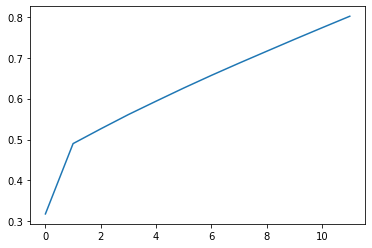

In [121]:
plt.plot(np.cumsum(pca_80.explained_variance_ratio_))
plt.show()


In [122]:
np.cumsum(pca_80.explained_variance_ratio_)

array([0.31831273, 0.49006659, 0.52609779, 0.56103042, 0.593716  ,
       0.62585836, 0.656789  , 0.68661952, 0.71573516, 0.74469662,
       0.77309464, 0.80117085])

In [123]:
pca_80

PCA(n_components=0.8)

In [124]:
x_train_pca_80

array([[  4.48923944,  23.38882165,  -1.24532729, ...,   0.66123479,
          3.65325296,   1.17611271],
       [-16.92757929, -21.7200057 ,   0.45323566, ...,  -0.04532611,
         -4.49249519,   4.2437332 ],
       [ 29.58543855,  -0.36706455,   8.00933071, ...,  -1.68492302,
         -3.40530005,  -8.35669067],
       ...,
       [ 23.5152475 ,   2.27117471,   5.06803993, ...,   1.88386524,
         -1.32021284,  -5.32223406],
       [ 32.73031492,  -4.06932209,  10.02554988, ...,  -8.06088276,
          3.08042358,   2.83465778],
       [-16.00692247,  16.37007392,  -6.46781205, ...,  -6.10966224,
          6.44692903,   0.74180138]])

##### Jawab: Hasil PCA adalah mengambil 12 Principal Components.

### Soal 2: K Means

Instruksi:
1. Dari data yang sudah di-PCA-kan (jadi datanya sudah baru ya, bukan data original lagi, ingat, data yang sudah di-PCA-kan), kita akan menentukan k = ?? yang paling ideal untuk clustering.
2. Lakukan Elbow dan Silhouette method
3. Visualisasikan hasil Elbow dan Silhouette method
4. Berapa nilai k yang terbaik? 

In [125]:
# Elbow Method
from sklearn.preprocessing import StandardScaler
score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster)
    scaled_data = StandardScaler().fit_transform(pca_df)
    kmeans.fit(scaled_data)
    score.append(kmeans.inertia_)

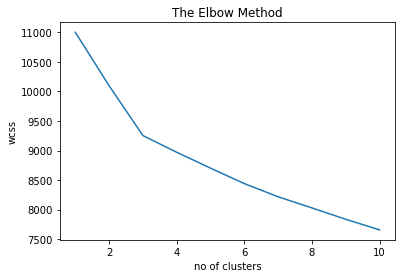

In [126]:
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

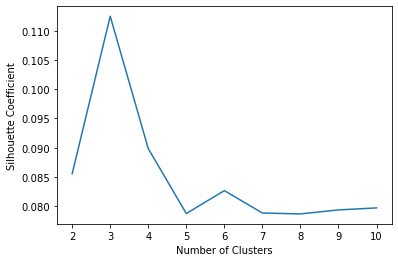

In [127]:
# Silhouette score

silhouette_coefficients = []
from sklearn.metrics import silhouette_score

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    scaled_data = StandardScaler().fit_transform(pca_df)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

##### Jawab: Nilai k yang terbaik berdasarkan Elbow dan Silhouette method adalah 3 karena 'Elbow' terletak di k=3 dan nilai Silhouette paling tinggi adalah k=3.

##### Berarti, kita bisa berasumsi bahwa k = 3 menjadi 'k' yang paling ideal dalam k-Means ini.